In [121]:
import pandas as pd
import numpy as np

data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


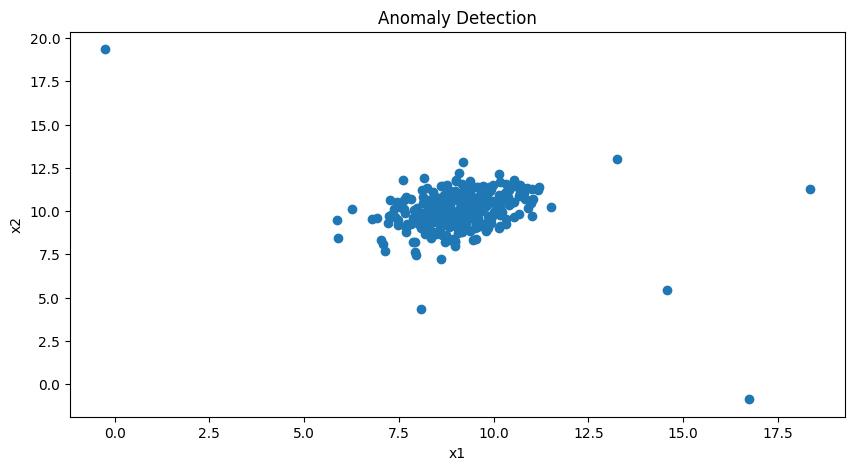

In [122]:
from matplotlib import pyplot as plt

x1 = data.loc[:, 'x1']
x2 = data.loc[:, 'x2']

fig1 = plt.figure(figsize=(10, 5))
plt.scatter(x1, x2)
plt.title('Anomaly Detection')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

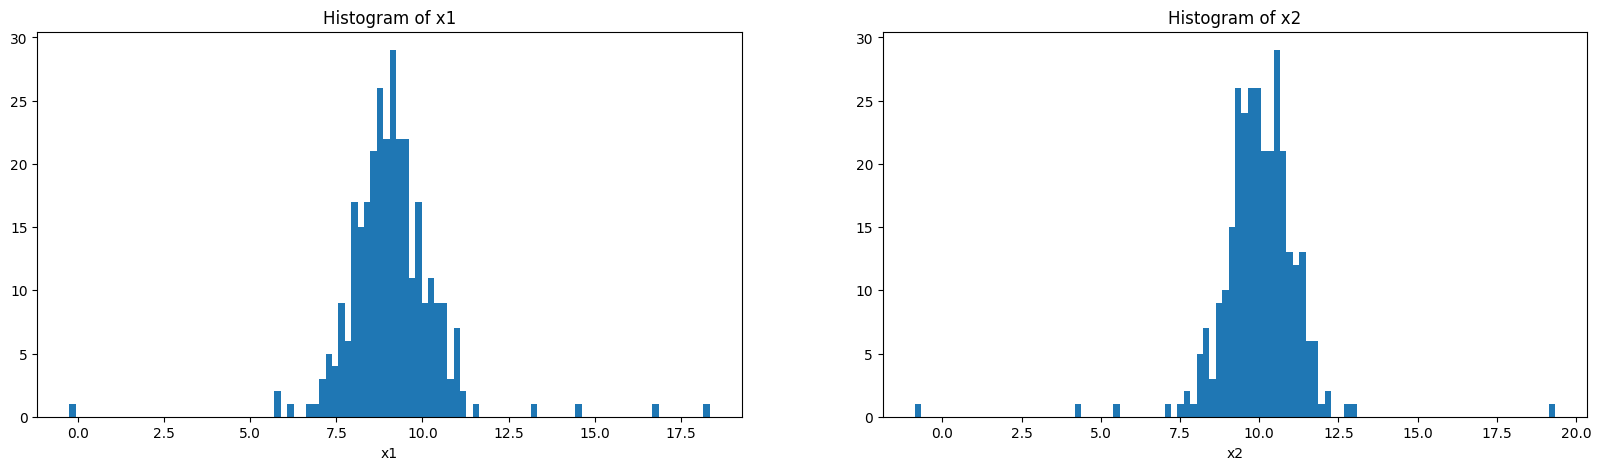

In [123]:
fig2 = plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x1, bins=100)
plt.title('Histogram of x1')
plt.xlabel('x1')

plt.subplot(122)
plt.hist(x2, bins=100)
plt.title('Histogram of x2')
plt.xlabel('x2')

plt.show()

In [124]:
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()
print('x1 mean:', x1_mean, 'x1 sigma:', x1_sigma, 'x2 mean:', x2_mean, 'x2 sigma:', x2_sigma)

x1 mean: 9.112225783931596 x1 sigma: 1.3559573758220915 x2 mean: 9.997710507954398 x2 sigma: 1.30970711753864


In [125]:
from scipy.stats import norm
x1_range = np.linspace(x1.min(), x1.max(), 300)
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)
x2_range = np.linspace(x2.min(), x2.max(), 300)
x2_normal = norm.pdf(x2_range, x2_mean, x2_sigma)

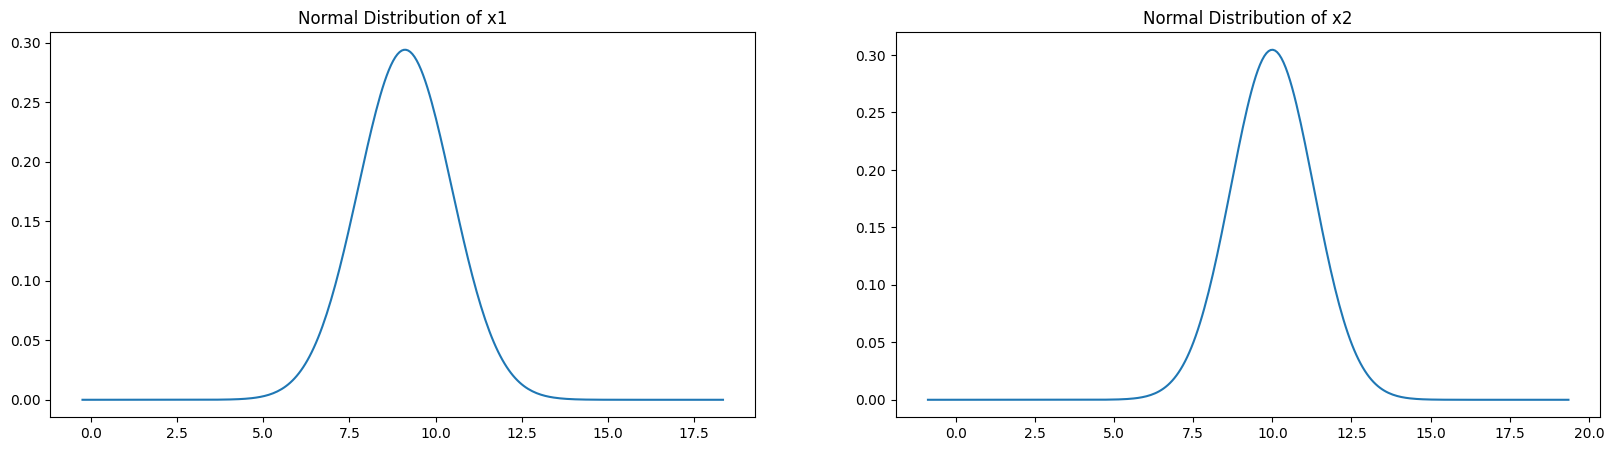

In [126]:
fig3 = plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(x1_range, x1_normal)
plt.title('Normal Distribution of x1')

plt.subplot(122)
plt.plot(x2_range, x2_normal)
plt.title('Normal Distribution of x2')

plt.show()

In [127]:
from sklearn.covariance import EllipticEnvelope

ad_model = EllipticEnvelope()
ad_model.fit(data)

EllipticEnvelope()

In [128]:
y_predict = ad_model.predict(data)
print(pd.Series.value_counts(y_predict))

 1    276
-1     31
Name: count, dtype: int64


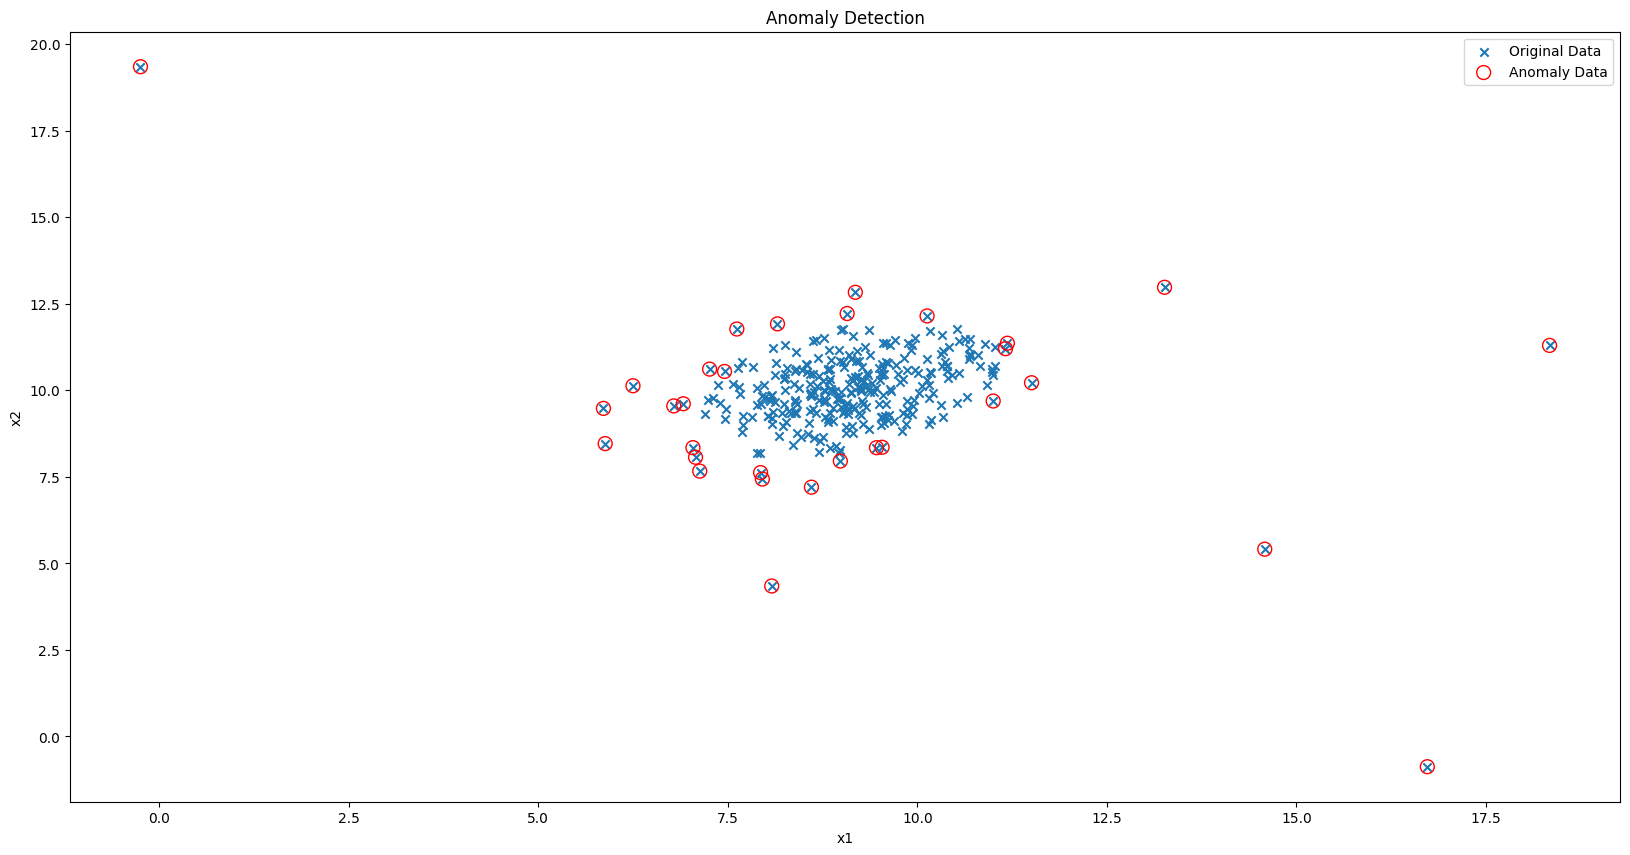

In [129]:
fig4 = plt.figure(figsize=(20, 10))
original_data = plt.scatter(x1, x2, marker='x')
anomaly_data = plt.scatter(x1[y_predict == -1], x2[y_predict == -1], marker='o', facecolors='none', edgecolors='r', s=100)

plt.title('Anomaly Detection')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original_data, anomaly_data), ('Original Data', 'Anomaly Data'))
plt.show()

In [130]:
ad_model2 = EllipticEnvelope(contamination=0.02)
ad_model2.fit(data)

EllipticEnvelope(contamination=0.02)

In [131]:
y_predict2 = ad_model2.predict(data)
print(pd.Series.value_counts(y_predict2))

 1    300
-1      7
Name: count, dtype: int64


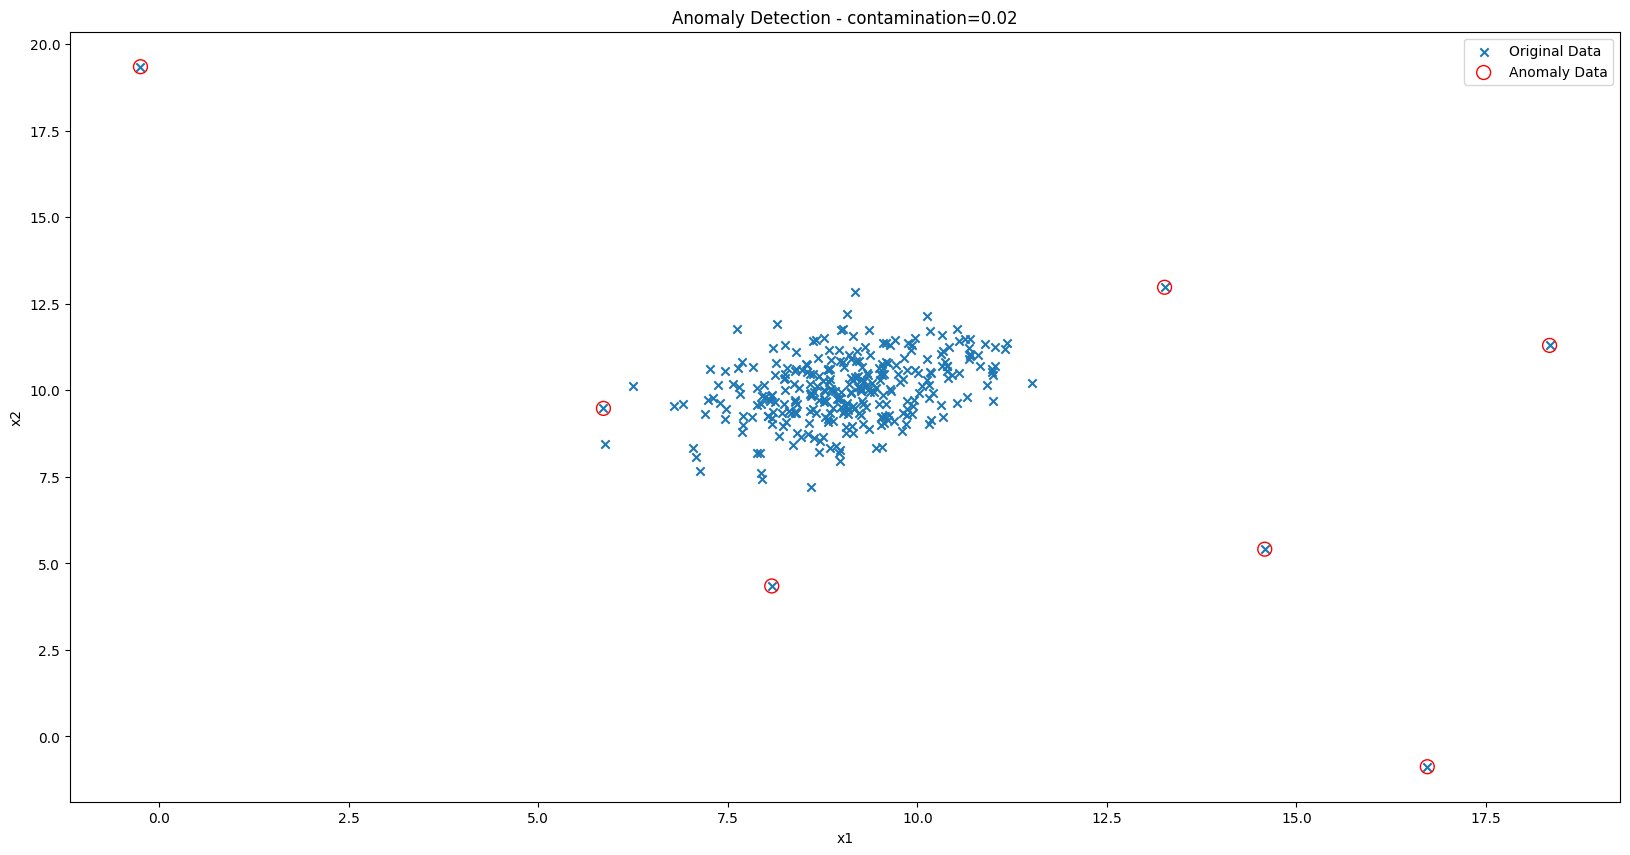

In [132]:
fig5 = plt.figure(figsize=(20, 10))
original_data = plt.scatter(x1, x2, marker='x')
anomaly_data2 = plt.scatter(x1[y_predict2 == -1], x2[y_predict2 == -1], marker='o', facecolors='none', edgecolors='r', s=100)

plt.title('Anomaly Detection - contamination=0.02')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((original_data, anomaly_data2), ('Original Data', 'Anomaly Data'))
plt.show()